In [1]:
import dask.dataframe as dd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import HeatMap

C:\Users\hp\AppData\Roaming\Python\Python312\site-packages\dask\dataframe\__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [2]:
# Load the dataset
df =pd.read_csv("US_Accidents_March23.csv")

In [3]:
df.head()

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,...,False,False,False,False,True,False,Day,Day,Day,Day


In [4]:
df.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,7.728394e+06,7.728394e+06,7.728394e+06,4.325632e+06,4.325632e+06,7.728394e+06,7.564541e+06,5.729375e+06,7.554250e+06,7.587715e+06,7.551296e+06,7.157161e+06,5.524808e+06
mean,2.212384e+00,3.620119e+01,-9.470255e+01,3.626183e+01,-9.572557e+01,5.618423e-01,6.166329e+01,5.825105e+01,6.483104e+01,2.953899e+01,9.090376e+00,7.685490e+00,8.407210e-03
std,4.875313e-01,5.076079e+00,1.739176e+01,5.272905e+00,1.810793e+01,1.776811e+00,1.901365e+01,2.238983e+01,2.282097e+01,1.006190e+00,2.688316e+00,5.424983e+00,1.102246e-01
min,1.000000e+00,2.455480e+01,-1.246238e+02,2.456601e+01,-1.245457e+02,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,3.339963e+01,-1.172194e+02,3.346207e+01,-1.177543e+02,0.000000e+00,4.900000e+01,4.300000e+01,4.800000e+01,2.937000e+01,1.000000e+01,4.600000e+00,0.000000e+00
50%,2.000000e+00,3.582397e+01,-8.776662e+01,3.618349e+01,-8.802789e+01,3.000000e-02,6.400000e+01,6.200000e+01,6.700000e+01,2.986000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,2.000000e+00,4.008496e+01,-8.035368e+01,4.017892e+01,-8.024709e+01,4.640000e-01,7.600000e+01,7.500000e+01,8.400000e+01,3.003000e+01,1.000000e+01,1.040000e+01,0.000000e+00
max,4.000000e+00,4.900220e+01,-6.711317e+01,4.907500e+01,-6.710924e+01,4.417500e+02,2.070000e+02,2.070000e+02,1.000000e+02,5.863000e+01,1.400000e+02,1.087000e+03,3.647000e+01


In [5]:
# Convert Start_Time to datetime
df['Start_Time'] = dd.to_datetime(df['Start_Time'], errors='coerce')

In [6]:
# Drop rows with NaT in Start_Time
df = df.dropna(subset=['Start_Time'])

In [7]:
df['Hour'] = df['Start_Time'].dt.hour

In [8]:
df.head()

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Hour
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,...,False,False,False,False,False,Night,Night,Night,Night,5
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,...,False,False,False,False,False,Night,Night,Night,Day,6
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,...,False,False,False,True,False,Night,Night,Day,Day,6
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,...,False,False,False,False,False,Night,Day,Day,Day,7
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,...,False,False,False,True,False,Day,Day,Day,Day,7


In [9]:
df.head()

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Hour
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,...,False,False,False,False,False,Night,Night,Night,Night,5
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,...,False,False,False,False,False,Night,Night,Night,Day,6
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,...,False,False,False,True,False,Night,Night,Day,Day,6
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,...,False,False,False,False,False,Night,Day,Day,Day,7
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,...,False,False,False,True,False,Day,Day,Day,Day,7


In [10]:
# Summary statistics
print(df.describe())

           Severity                     Start_Time     Start_Lat  \
count  6.985228e+06                        6985228  6.985228e+06   
mean   2.229248e+00  2020-03-21 21:49:59.056442112  3.622647e+01   
min    1.000000e+00            2016-01-14 20:18:33  2.455480e+01   
25%    2.000000e+00  2018-09-17 02:20:31.750000128  3.342209e+01   
50%    2.000000e+00     2020-06-23 13:37:23.500000  3.581521e+01   
75%    2.000000e+00            2021-10-28 15:44:07  4.009647e+01   
max    4.000000e+00            2023-03-31 23:30:00  4.900220e+01   
std    4.988711e-01                            NaN  5.055433e+00   

          Start_Lng       End_Lat       End_Lng  Distance(mi)  Temperature(F)  \
count  6.985228e+06  3.582466e+06  3.582466e+06  6.985228e+06    6.839140e+06   
mean  -9.476577e+01  3.632363e+01 -9.606114e+01  5.168789e-01    6.168508e+01   
min   -1.246238e+02  2.456601e+01 -1.245457e+02  0.000000e+00   -8.900000e+01   
25%   -1.172176e+02  3.350703e+01 -1.178403e+02  0.000000e+00  

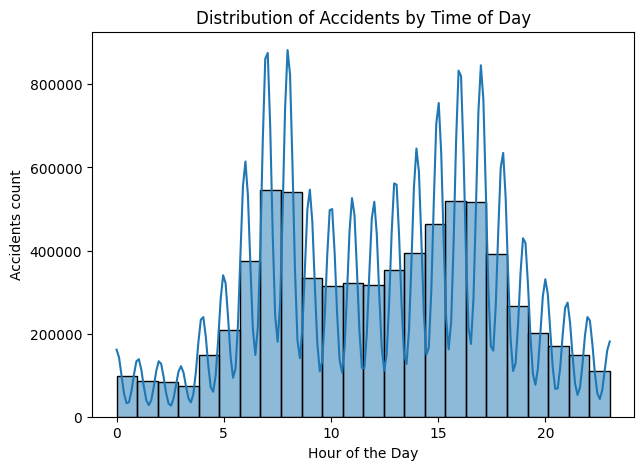

In [20]:
# Distribution of accidents by time of day
df['Start_Time'] = pd.to_datetime(df['Start_Time'])
df['Hour'] = df['Start_Time'].dt.hour
plt.figure(figsize=(7, 5))
sns.histplot(df['Hour'], bins=24, kde=True)
plt.title('Distribution of Accidents by Time of Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Accidents count')
plt.show()

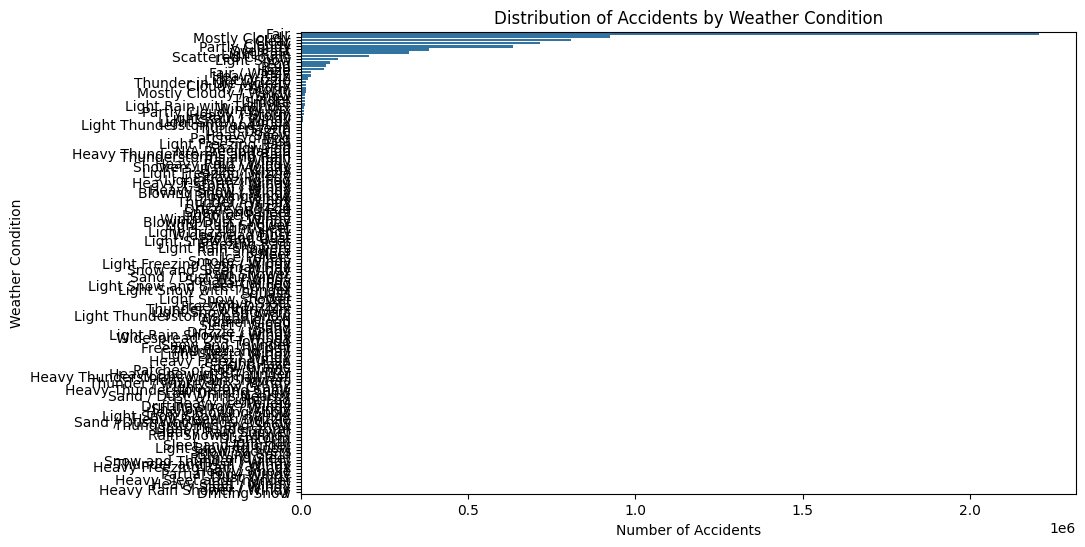

In [21]:
# Distribution of accidents by weather condition
plt.figure(figsize=(10, 6))
sns.countplot(y='Weather_Condition', data=df, order=df['Weather_Condition'].value_counts().index)
plt.title('Distribution of Accidents by Weather Condition')
plt.xlabel('Number of Accidents')
plt.ylabel('Weather Condition')
plt.show()

In [22]:
# Distribution of accidents by road condition 
if 'Road_Condition' in df.columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(y='Road_Condition', data=df, order=df['Road_Condition'].value_counts().index)
    plt.title('Distribution of Accidents by Road Condition')
    plt.xlabel('Number of Accidents')
    plt.ylabel('Road Condition')
    plt.show()
else:
    print("Data not available.")

Data not available.


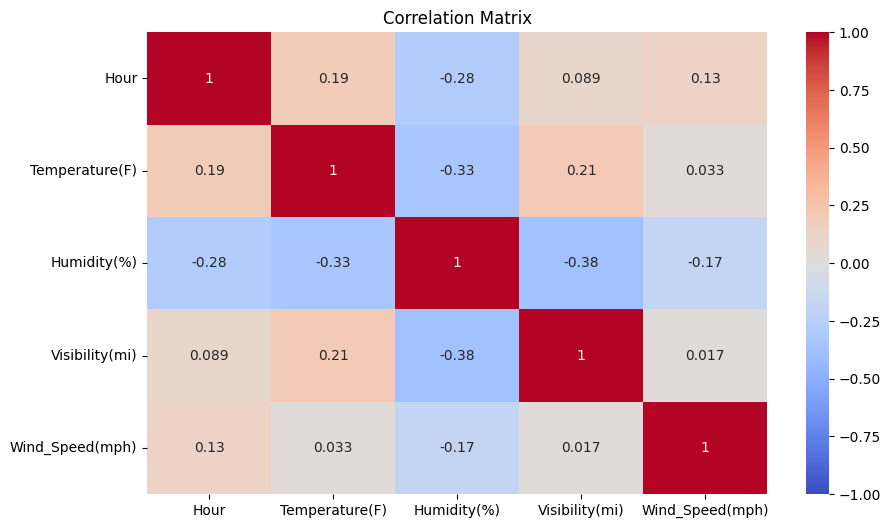

In [23]:
# Correlation analysis
correlation_matrix = df[['Hour', 'Temperature(F)', 'Humidity(%)', 'Visibility(mi)', 'Wind_Speed(mph)']].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

In [27]:
sample_df = df.sample(frac=0.1)

In [28]:
# Compute the sampled DataFrame 
sample_df = sample_df.compute()

AttributeError: 'DataFrame' object has no attribute 'compute'

In [29]:
heat_data = sample_df[['Start_Lat', 'Start_Lng']].values.tolist()

In [30]:
map = folium.Map(location=[sample_df['Start_Lat'].mean(), sample_df['Start_Lng'].mean()], zoom_start=5)

In [31]:
HeatMap(heat_data).add_to(map)

In [32]:
map.save('accident_hotspots.html')